In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data.make_dataset import load_data
from src.features.transformations import clean_data
from src.features.build_features import load_features
sns.set_theme()

In [2]:
dataset_path = Path().absolute() / "../data/raw/AirlineQuotesData.xlsx"
raw_data = load_data(dataset_path, "Flight Duplicate Quotes")
loaded_features = load_features(raw_data)
cleaned_data = clean_data(raw_data)

# Visualise with Additional Features

- Average number of quotes before a non-sale quote.
- Average number of quotes made before a sale.
- Popular months for sales.

Text(0.5, 1.0, 'Number of Quotes Before Sale or No Buy')

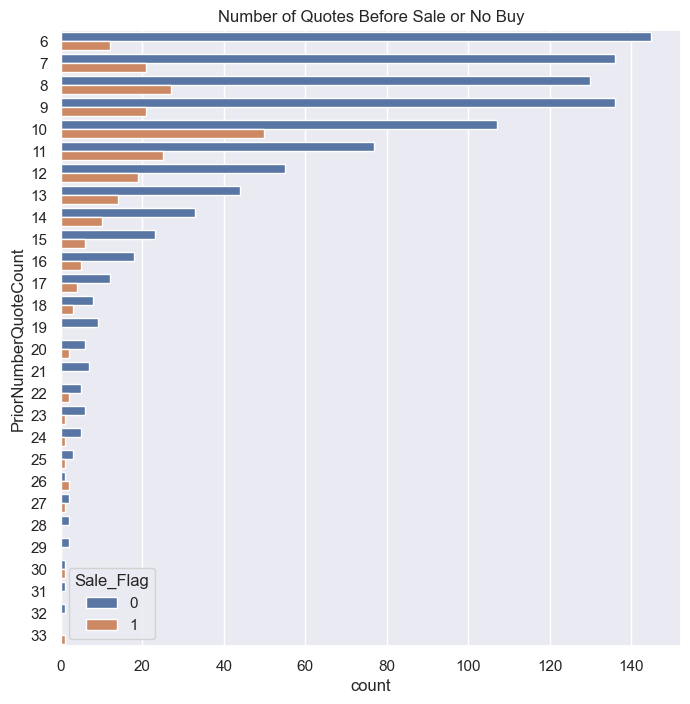

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot(
    loaded_features[loaded_features.PriorNumberQuoteCount>=6], y="PriorNumberQuoteCount", hue="Sale_Flag",
)
plt.title("Number of Quotes Before Sale or No Buy")


Text(0.5, 1.0, 'Deduplicated Number of Quotes before closed or non closed')

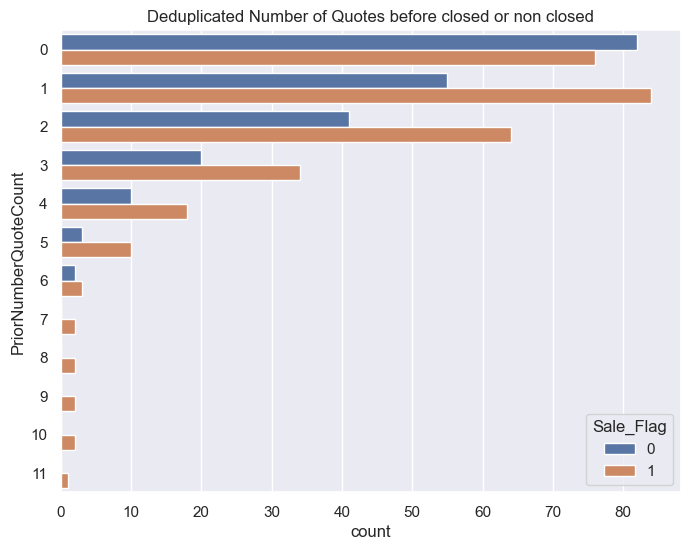

In [4]:
temp = load_features(cleaned_data)
plt.figure(figsize=(8, 6))
sns.countplot(
    temp, y="PriorNumberQuoteCount", hue="Sale_Flag", 
)

plt.title("Deduplicated Number of Quotes before closed or non closed")

In [5]:
temp1 = temp[temp.Sale_Flag ==0]
temp1[temp1.PriorNumberQuoteCount>=0].PriorNumberQuoteCount.mean()

1.2394366197183098

Number of quotes before a non-sale